In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from viz_utils import *
from dataloaders import *

In [102]:
RESULT_PATH = "results/"
DATASET = "IMDB"
MODEL = "JWA"

In [103]:
experiments, meta = load_results(base_dir=RESULT_PATH, dataset=DATASET, model=MODEL)
df_tr, df_agr, df_crt_train, df_crt_test, df_attr = results_to_df(experiments, meta)

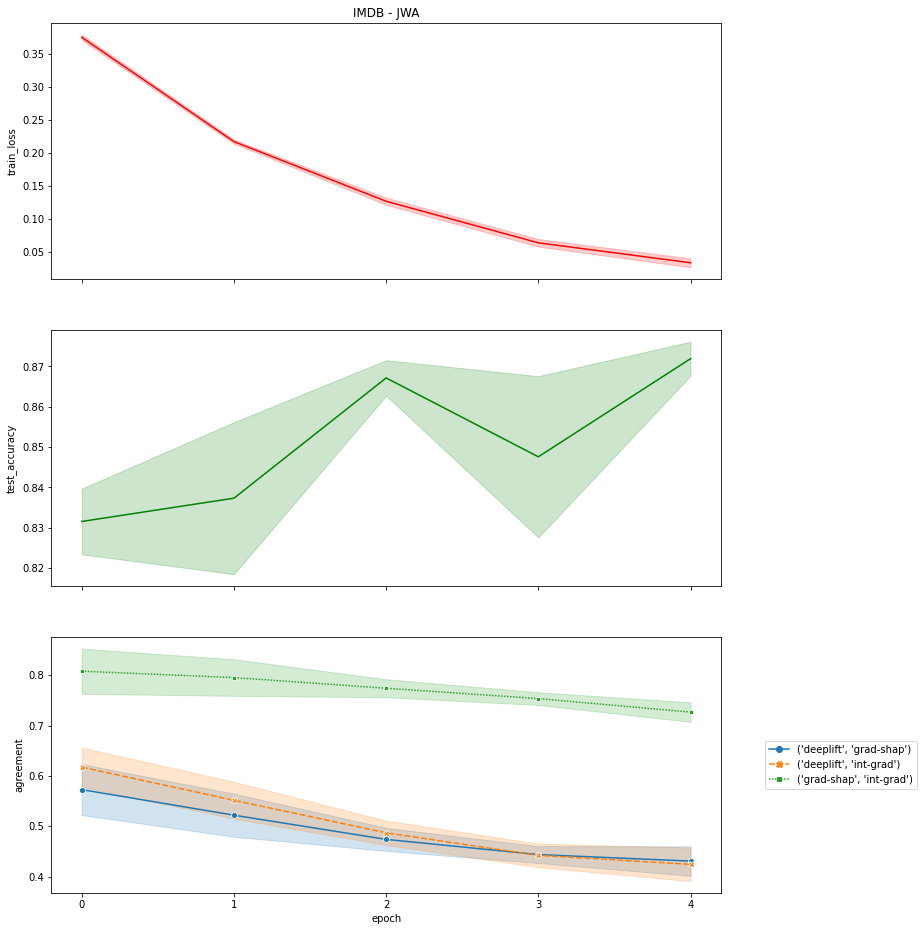

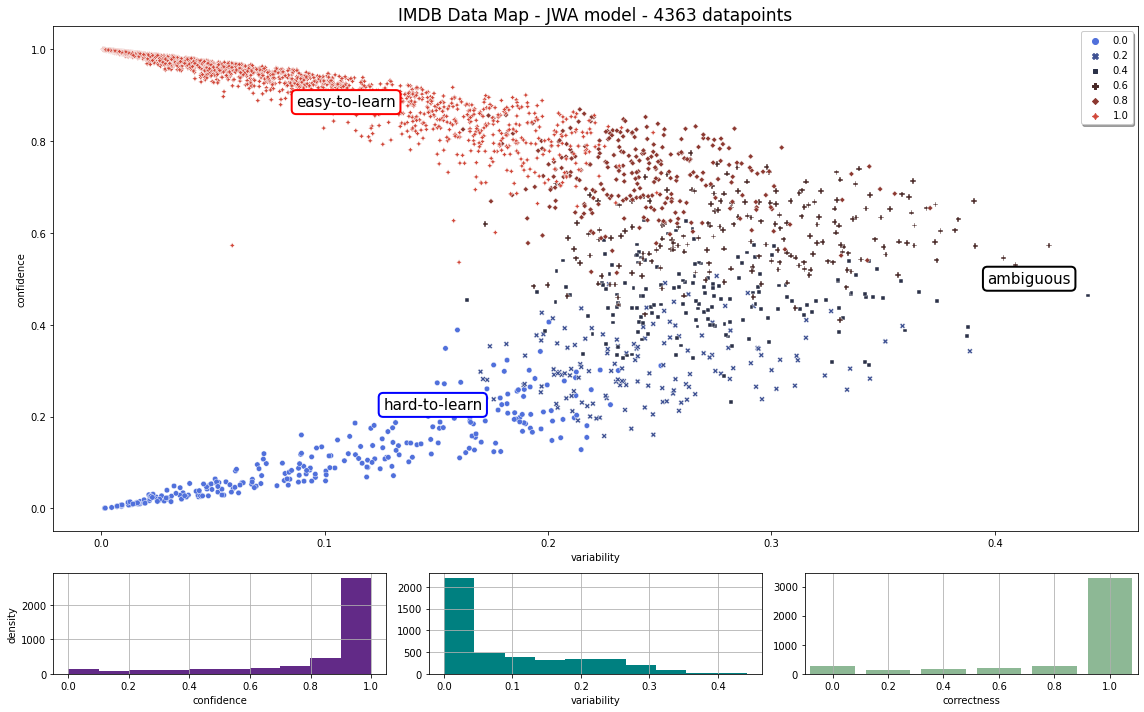

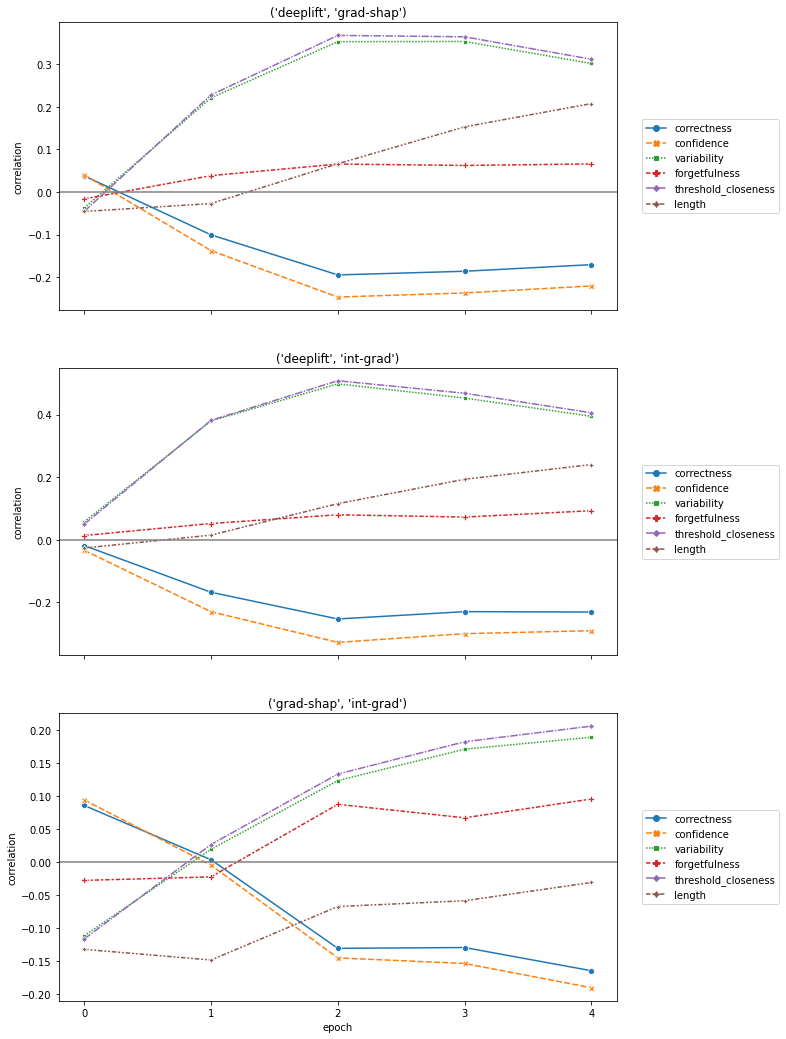

In [104]:
plot_experiment(df_tr, df_agr, meta)
fig = plot_cartography(df_crt_test, meta, hue_metric="correct")
df_corrs = plot_correlations(df_agr, df_crt_test, meta, print_flag=False)

In [108]:
(train, val, test), vocab = load_imdb()
test = test[meta["test_mapping"]]

correctness = df_crt_test.correctness.to_numpy()

easy = np.where(correctness == 5.)[0]
hard = np.where(correctness == 0.)[0]
ambiguous = np.where((correctness == 2.) | (correctness == 3.))[0]

easy_size = np.minimum(100, easy.size)
hard_size = np.minimum(100, hard.size)
ambiguous_size = np.minimum(100, ambiguous.size)
                   
easy = np.random.choice(easy, replace=False, size=easy_size)
hard = np.random.choice(hard, replace=False, size=hard_size)
ambiguous = np.random.choice(ambiguous, replace=False, size=ambiguous_size)


LABEL_MAP = {"1": "positive", "0": "negative"}

texts = []
tokens = []
labels = []
token_len = 100

for ids in [easy, hard, ambiguous]:
    for ex in test_sh[ids]:
        texts.append(ex.text[0])
        toks = ex.text[1]
        tokens.append(toks)
        labels.append(LABEL_MAP[ex.label[1]])

types = ["easy"] * easy_size + ["hard"] * hard_size + ["ambiguous"] * ambiguous_size
df_text = pd.DataFrame({"text": texts, "tokens": tokens, "label": labels, "type": types})

In [119]:
grouped = df_attr.groupby(level=[1, 2])
df = grouped.agg(np.mean)
df = df[df.index.get_level_values("epoch") == 4]

In [218]:
df_agr

agreement  \
experiment epoch interpreter                        
0          0     (deeplift, grad-shap)   0.512830   
           1     (deeplift, grad-shap)   0.480509   
           2     (deeplift, grad-shap)   0.436120   
           3     (deeplift, grad-shap)   0.433826   
           4     (deeplift, grad-shap)   0.426255   
...                                           ...   
4          0     (grad-shap, int-grad)   0.796150   
           1     (grad-shap, int-grad)   0.797160   
           2     (grad-shap, int-grad)   0.783269   
           3     (grad-shap, int-grad)   0.757623   
           4     (grad-shap, int-grad)   0.727079   

                                                                              correlation  
experiment epoch interpreter                                                               
0          0     (deeplift, grad-shap)  [0.4360804020100502, 0.5082412060301507, 0.091...  
           1     (deeplift, grad-shap)  [0.39638190954773866, 0.26914572864321606, 0.6...  
           2     (deeplift, grad-shap)  [0.384321608040201, 0.524321608040201, 0.62130...  
           3     (deeplift, grad-shap)  [0.5450251256281406, 0.4381909547738693, 0.315...  
           4     (deeplift, grad-shap)  [0.5473366834170854, 0.6429145728643215, 0.505...  
...                                                                                   ...  
4          0     (grad-shap, int-grad)  [0.9185929648241206, 0.7428140703517587, 0.672...  
           1     (grad-shap, int-grad)  [0.8733668341708543, 0.7604020100502512, 0.435...  
           2     (grad-shap, int-grad)  [0.8286432160804019, 0.6089447236180904, 0.729...  
           3     (grad-shap, int-grad)  [0.8617085427135678, 0.7654271356783918, 0.853...  
           4     (grad-shap, int-grad)  [0.7554773869346734, 0.849748743718593, 0.6423...  

[75 rows x 2 columns]

In [121]:
df_attr_cart_easy = df.take(easy)
df_attr_cart_hard = df.take(hard)
df_attr_cart_amb = df.take(ambiguous)

df_attr_cart = pd.concat([df_attr_cart_easy, df_attr_cart_hard, df_attr_cart_amb])

In [122]:
df_text.index = df_attr_cart.index

In [124]:
df_sample = pd.concat([df_text, df_attr_cart], axis=1)

In [126]:
ex = df_sample.iloc[0]

In [ ]:
df_sample.to_csv("IMDB_sentences_sample.csv")

In [ ]:
dftest = pd.read_csv("IMDB_sentences_sample.csv", index_col=0)
dftest

In [ ]:
i = 0
corr = agr[agr.index.get_level_values(0) == i].correlation
crt = df_crt_test[df_crt_test.index.get_level_values(1) == i]

In [ ]:
plot_al_accuracy(df_tr, ci=90)

In [8]:
full = pd.read_csv("data/IMDB_sample.csv")
sent = pd.read_csv("data/IMDB_sentences_sample.csv")

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [20]:
df = pd.read_csv("data/IMDB/dev.csv", header=None)
df.to_csv("data/IMDB/dev.csv", header=False)

In [200]:
df_sample

text  \
epoch example                                                      
4     1108     i being a fan of rupert rented this film a few...   
      3495     this game is very good for the n64 you can ska...   
      73       we have a character named just wants to be a g...   
      872      ah how refreshing to see a vision of 18th cent...   
      4003     i usually really enjoy steven seagal movies th...   
...                                                          ...   
      921      my sister a friend and i went to see this film...   
      646      i watched this movie on video the other night ...   
      153      a young woman jodie foster is witnessing a maf...   
      1048     obviously made on the cheap to capitalize on t...   
      2642     anyone who sees this film will notice that the...   

                                                          tokens     label  \
epoch example                                                                
4     1108     [i, being, a, fan, of, rupert, rented, this, f...  positive   
      3495     [this, game, is, very, good, for, the, n64, yo...  positive   
      73       [we, have, a, character, named, just, wants, t...  positive   
      872      [ah, how, refreshing, to, see, a, vision, of, ...  positive   
      4003     [i, usually, really, enjoy, steven, seagal, mo...  negative   
...                                                          ...       ...   
      921      [my, sister, a, friend, and, i, went, to, see,...  positive   
      646      [i, watched, this, movie, on, video, the, othe...  negative   
      153      [a, young, woman, jodie, foster, is, witnessin...  negative   
      1048     [obviously, made, on, the, cheap, to, capitali...  positive   
      2642     [anyone, who, sees, this, film, will, notice, ...  negative   

                    type                                           deeplift  \
epoch example                                                                 
4     1108          easy  [0.0047530597, 0.011395179, 0.0018161904, 0.01...   
      3495          easy  [0.013320727, 0.099180534, 0.043172635, 0.0354...   
      73            easy  [0.012848902, 0.024646025, 0.012136162, 0.0421...   
      872           easy  [0.052117676, 0.045864712, 0.64283836, 0.04349...   
      4003          easy  [0.07137638, 0.2638381, 0.29484555, 0.38965744...   
...                  ...                                                ...   
      921      ambiguous  [0.0073576346, 0.03668315, 0.010556183, 0.0098...   
      646      ambiguous  [0.007630578, 0.01827124, 0.005241587, 0.00787...   
      153      ambiguous  [0.0001959744, 0.0006058351, 0.0018923141, 0.0...   
      1048     ambiguous  [0.02140869, 0.002227771, 0.0015668856, 0.0130...   
      2642     ambiguous  [0.021845987, 0.011168695, 0.019966666, 0.0109...   

                                                       grad-shap  \
epoch example                                                      
4     1108     [0.025451358, 0.029934257, 0.013480279, 0.0342...   
      3495     [0.8717744, 0.7809659, 0.7841218, 1.2142696, 0...   
      73       [0.024583334, 0.028701648, 0.020893749, 0.0383...   
      872      [0.21624148, 0.2228395, 2.10632, 0.07349019, 0...   
      4003     [0.1068686, 0.2926352, 0.29908612, 0.449778, 0...   
...                                                          ...   
      921      [0.106673166, 0.05591898, 0.021418642, 0.04235...   
      646      [0.05948489, 0.0832118, 0.040378243, 0.0475864...   
      153      [0.014163902, 0.009804582, 0.018309968, 0.0097...   
      1048     [0.07932691, 0.0065603093, 0.011450963, 0.0182...   
      2642     [0.101639844, 0.076189905, 0.024250802, 0.0693...   

                                                        int-grad  
epoch example                                                     
4     1108     [0.03351603415419413, 0.032854756014722306, 0....  
      3495     [0.669484404768337, 0.783213879

In [148]:
ex

text         i being a fan of rupert rented this film a few...
tokens       [i, being, a, fan, of, rupert, rented, this, f...
label                                                 positive
type                                                      easy
deeplift     [0.0047530597, 0.011395179, 0.0018161904, 0.01...
grad-shap    [0.025451358, 0.029934257, 0.013480279, 0.0342...
int-grad     [0.03351603415419413, 0.032854756014722306, 0....
Name: (4, 1108), dtype: object

In [319]:
cmap(2)

(0.2389484589019608, 0.3123654946588235, 0.7656759021764705, 1.0)

In [344]:
import matplotlib
from spacy import displacy
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.preprocessing import normalize



TPL_TOK = """
<mark class="entity" style="background: {bg}; padding: 0.45em 0.6em; margin: 0 0.05em; line-height: 1; border-radius: 0.01em; box-decoration-break: clone; -webkit-box-decoration-break: clone">
    {text}
</mark>
"""

cmap = sns.color_palette("coolwarm", as_cmap=True)


def example_viz(example, interpreter="deeplift"):
    mms = MMS((0, 256))
    colors = mms.fit_transform(example[interpreter].reshape(-1, 1)).ravel().astype(np.int32)
    colors = {
        str(i): matplotlib.colors.to_hex(cmap(c), keep_alpha=True)
        for i, c in enumerate(colors)
    }

    ents = []
    ii = 0
    for itok in range(len(example.tokens)):
        ff = ii + len(example.tokens[itok])
        ent = {
            "start": ii,
            "end": ff,
            "label": str(itok),
        }
        ents.append(ent)
        ii = ff

    to_render = {
        "text": "".join(example.tokens),
        "ents": ents,
    }
    
    html = displacy.render(
        to_render, 
        style='ent', 
        manual=True, 
        jupyter=True, 
        options={'colors': colors, 'template': TPL_TOK},
    )
    
    return html


i = 250
for interpreter in ["deeplift", "int-grad", "grad-shap"]:
    ex = df_sample.iloc[i]
    print(f"Sentiment: {ex.label}")
    print(f"Cartography: {ex.type}")
    print(f"Interpreter: {interpreter}")
    example_viz(df_sample.iloc[i], interpreter=interpreter)
    print("="*100)

Sentiment: negative
Cartography: ambiguous
Interpreter: deeplift


Sentiment: negative
Cartography: ambiguous
Interpreter: int-grad


Sentiment: negative
Cartography: ambiguous
Interpreter: grad-shap


In [332]:
cmap(8.296475)

(0.705673158, 0.01555616, 0.150232812, 1.0)

In [335]:
cmap(35)

(0.39923148431372546, 0.5285284721568628, 0.9284591027843138, 1.0)

In [333]:
matplotlib.colors.to_hex((0.705673158, 0.01555616, 0.150232812, 0.4), keep_alpha=True)

'#b4042666'

In [315]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler((0, 256))

mms.fit_transform(ex.deeplift.reshape(-1, 1)).ravel()

array([  8.296475  ,  10.660156  ,   3.048017  ,   5.522405  ,
         2.9006886 ,   5.294363  ,   6.7393107 ,   3.3989391 ,
        12.013611  ,   6.1252413 ,   5.380183  ,  35.524452  ,
        11.877409  ,  25.415634  ,  12.039393  ,  19.398117  ,
         8.951243  ,  46.799267  , 256.        , 115.931915  ,
       106.41697   , 117.87244   , 250.41461   ,  28.499945  ,
        27.387886  ,  18.804102  ,  18.411478  ,   4.169341  ,
         5.049014  ,  13.368792  ,   9.33808   ,  22.865646  ,
        33.284462  ,   7.2346325 ,  32.8549    ,  16.099031  ,
       123.84368   ,  31.024405  ,   7.609308  ,   3.6290183 ,
         1.8823543 ,  23.46725   ,   2.048318  ,   6.1063867 ,
         1.857693  ,   3.5518801 ,  17.302681  ,  23.971102  ,
         1.0443937 ,   1.1334847 ,   2.3519762 ,   3.1934245 ,
         9.951098  ,   2.3088784 ,   1.5232279 ,   2.5225492 ,
         2.0479975 ,   1.6139902 ,   3.0042253 ,  14.13563   ,
         4.4028573 ,  16.204857  ,   1.4498835 ,  10.69

In [310]:
ex.deeplift

array([0.0481412 , 0.06141297, 0.01867178, 0.03256515, 0.01784455,
       0.03128472, 0.03939792, 0.02064216, 0.06901245, 0.03595   ,
       0.03176659, 0.20102283, 0.06824769, 0.1442631 , 0.06915721,
       0.11047552, 0.05181764, 0.2643295 , 1.4389651 , 0.6525005 ,
       0.5990753 , 0.6633963 , 1.4076037 , 0.16158111, 0.15533705,
       0.1071402 , 0.10493566, 0.02496787, 0.02990712, 0.07662161,
       0.05398969, 0.12994525, 0.18844557, 0.04217909, 0.18603364,
       0.09195156, 0.6969241 , 0.17575563, 0.04428284, 0.02193402,
       0.01212673, 0.13332318, 0.01305859, 0.03584413, 0.01198826,
       0.0215009 , 0.0987099 , 0.13615224, 0.00742169, 0.00792192,
       0.0147636 , 0.01948822, 0.05743171, 0.01452161, 0.01011028,
       0.01572134, 0.01305679, 0.0106199 , 0.01842589, 0.08092731,
       0.02627903, 0.09254576, 0.00969846, 0.06161953, 0.01450212,
       0.00896878, 0.0062182 , 0.03879736, 0.02696651, 0.0474368 ,
       0.07172453, 0.12454972, 0.00499331, 0.05142011, 0.03708

In [227]:
vals = []



for i, row in df_sample.iterrows():
    deep = row["deeplift"] 

array([ 0.87009054,  0.8102263 ,  0.8867136 ,  0.7997596 ,  0.895455  ,
        0.82615304,  0.8265165 ,  0.6524962 ,  0.81471676,  0.7583333 ,
        0.864377  ,  0.44377568,  0.85926294,  0.71854436,  0.84173614,
        0.82964486,  0.8698653 ,  0.36478826, -1.8680527 , -0.2971483 ,
        0.16013694, -0.73328584, -3.579547  ,  0.75951344,  0.4774928 ,
        0.6288912 ,  0.8408604 ,  0.8845349 ,  0.901686  ,  0.8480219 ,
        0.8184196 ,  0.7575773 ,  0.70381933,  0.8795532 ,  0.6626846 ,
        0.7753988 , -0.30437344,  0.6326982 ,  0.90096676,  0.9500686 ,
        0.95154864,  0.62646055,  0.96062005,  0.930796  ,  0.9624625 ,
        0.94531256,  0.8185552 ,  0.7485814 ,  0.9825191 ,  0.97213864,
        0.9592489 ,  0.8912266 ,  0.893226  ,  0.9733535 ,  0.98185766,
        0.96728563,  0.9551672 ,  0.9303485 ,  0.8293494 ,  0.7826513 ,
        0.9421366 ,  0.79317933,  0.9492266 ,  0.75431603,  0.96659523,
        0.95952386,  0.93913585,  0.6827556 ,  0.95466113,  0.59

In [220]:
from scipy.stats import kendalltau

array([0.0481412 , 0.06141297, 0.01867178, 0.03256515, 0.01784455,
       0.03128472, 0.03939792, 0.02064216, 0.06901245, 0.03595   ,
       0.03176659, 0.20102283, 0.06824769, 0.1442631 , 0.06915721,
       0.11047552, 0.05181764, 0.2643295 , 1.4389651 , 0.6525005 ,
       0.5990753 , 0.6633963 , 1.4076037 , 0.16158111, 0.15533705,
       0.1071402 , 0.10493566, 0.02496787, 0.02990712, 0.07662161,
       0.05398969, 0.12994525, 0.18844557, 0.04217909, 0.18603364,
       0.09195156, 0.6969241 , 0.17575563, 0.04428284, 0.02193402,
       0.01212673, 0.13332318, 0.01305859, 0.03584413, 0.01198826,
       0.0215009 , 0.0987099 , 0.13615224, 0.00742169, 0.00792192,
       0.0147636 , 0.01948822, 0.05743171, 0.01452161, 0.01011028,
       0.01572134, 0.01305679, 0.0106199 , 0.01842589, 0.08092731,
       0.02627903, 0.09254576, 0.00969846, 0.06161953, 0.01450212,
       0.00896878, 0.0062182 , 0.03879736, 0.02696651, 0.0474368 ,
       0.07172453, 0.12454972, 0.00499331, 0.05142011, 0.03708

In [224]:
kendalltau(ex.deeplift, ex["int-grad"])

KendalltauResult(correlation=0.6152254249815227, pvalue=8.991619771940206e-32)

In [71]:
!pip install thermostat

     |████████████████████████████████| 314 kB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 584 kB 88.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.1 MB 101.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 138.7 MB/s eta 0:00:01
     |████████████████████████████████| 9.9 MB 93.0 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 94.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 84.2 MB/s eta 0:00:01
     |████████████████████████████████| 153 kB 101.7 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 28.8 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 105.6 MB/s eta 0:00:01
  Created wheel for thermostat: filename=thermostat-1.7.4-py3-none-any.whl size=326437 sha256=ea4403dcd1c89b047a285874d55a7050d6b4a9fc7abd3012737ba0bd7731a199
  Stored in directory: /home/jjukic/.cache/pip/wheels/3b/5c/59/bc2280c24b8e9f1a42a203a2854c82d8e1a30e1c2569268cfe
Successfully built thermostat
  Att